In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pickle

In [2]:
df = pd.read_csv("temperature.csv")
df.head(10)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
5,6.0,30-06-2013,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,...,0.0,0.0,0.0,37.5102,127.042,54.6384,0.1457,5873.780762,31.5,24.0
6,7.0,30-06-2013,31.4,24.4,56.287189,81.019760,28.551859,24.238467,5.587135,125.110007,...,0.0,0.0,0.0,37.5776,126.838,12.3700,0.0985,5849.233398,30.9,23.4
7,8.0,30-06-2013,32.1,23.6,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,...,0.0,0.0,0.0,37.4697,126.910,52.5180,1.5629,5863.992188,31.1,22.9
8,9.0,30-06-2013,31.4,22.0,55.338791,80.784607,28.426975,23.332373,6.017135,85.110971,...,0.0,0.0,0.0,37.4967,126.826,50.9312,0.4125,5876.901367,31.3,21.6
9,10.0,30-06-2013,31.6,20.5,56.651203,86.849632,27.576705,22.527018,6.518841,63.006075,...,0.0,0.0,0.0,37.4562,126.955,208.5070,5.1782,5893.608398,30.5,21.0


In [3]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

## EDA

In [4]:
df = df.drop(["station", "Date"], axis = 1)

In [5]:
df.isna().sum()

Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [6]:
df = df.dropna()

C:\Users\Surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


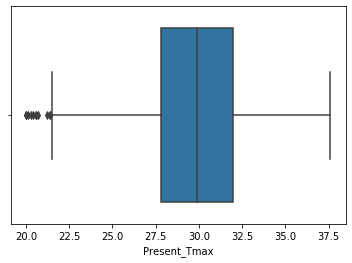

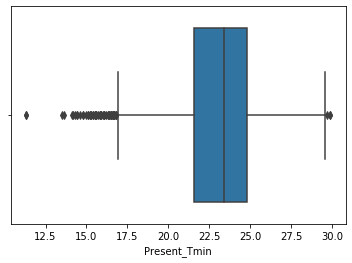

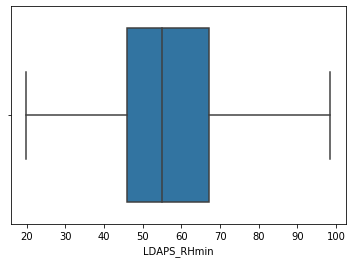

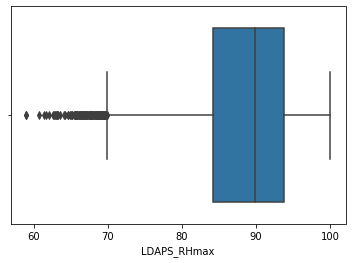

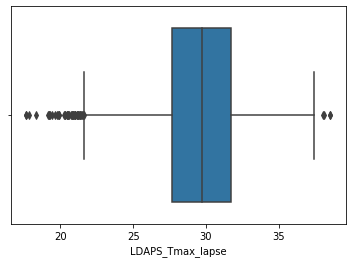

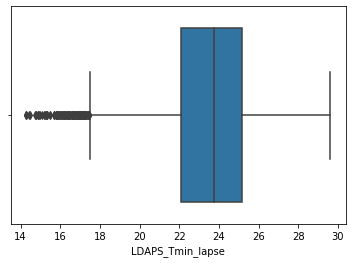

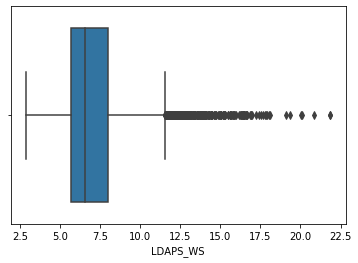

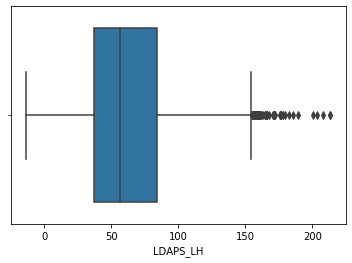

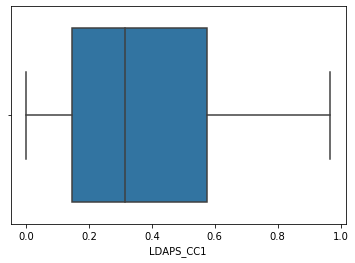

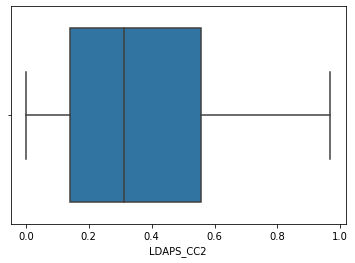

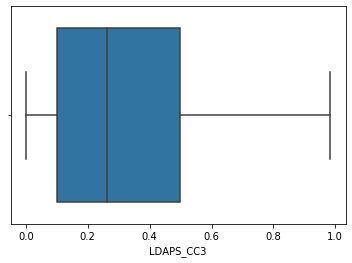

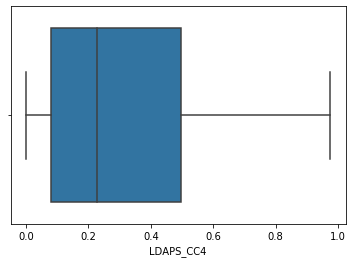

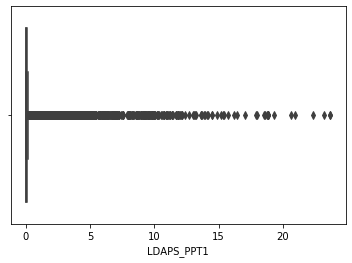

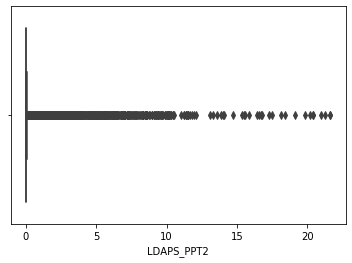

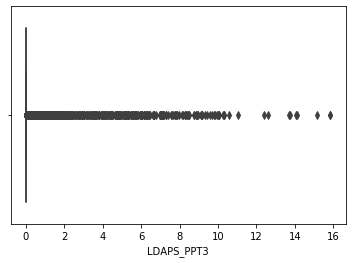

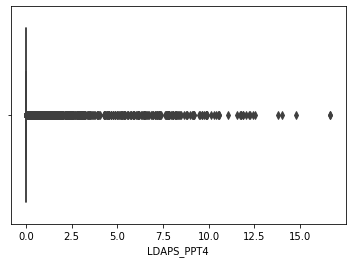

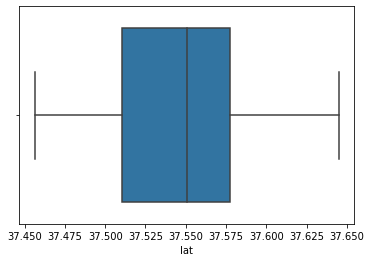

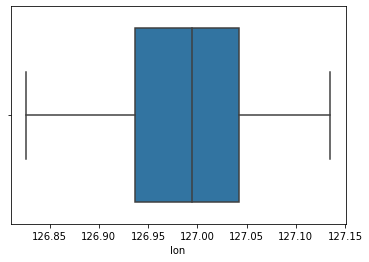

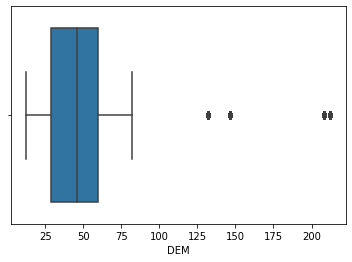

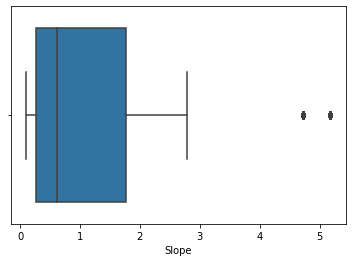

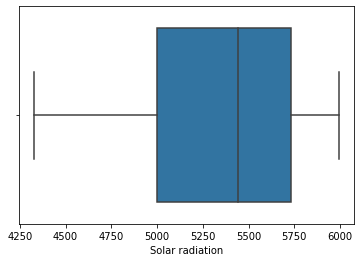

In [7]:
feat = list(df.drop(["Next_Tmax", "Next_Tmin"], axis = 1).columns)
for i in feat:
    plt.figure()
    sns.boxplot(x=df[i])

In [8]:
df1 = df # creating a copy of data
for i in feat:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 
    filter = (df[i] >= Q1 - 1.5 * IQR) & (df[i] <= Q3 + 1.5 *IQR)
    df1 = df1.loc[filter]
df1.shape

(3171, 23)

Since we are loosing huge amount of data on removing the outliers. So will avoid to remove the outliers.

In [9]:
df[feat].corr()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
Present_Tmax,1.000000,0.616291,-0.206529,-0.303867,0.574947,0.629656,-0.122206,0.136401,-0.314411,-0.215191,...,-0.141384,-0.109440,-0.099354,-0.120804,-0.100955,-0.052594,0.009215,-0.187753,-0.105532,-0.020531
Present_Tmin,0.616291,1.000000,0.124516,-0.015260,0.469881,0.772811,-0.034831,-0.009656,0.085882,0.091572,...,-0.044822,0.114859,0.070025,-0.046608,-0.064180,-0.079332,-0.043030,-0.251791,-0.146422,0.061699
LDAPS_RHmin,-0.206529,0.124516,1.000000,0.579035,-0.565579,0.087319,0.291387,-0.069574,0.613281,0.745043,...,0.514552,0.260943,0.390090,0.239580,0.170301,0.086238,-0.076101,0.101876,0.123620,0.243164
LDAPS_RHmax,-0.303867,-0.015260,0.579035,1.000000,-0.373342,-0.115966,0.133150,0.240453,0.436418,0.391177,...,0.128209,0.267867,0.227823,0.133673,0.119518,0.195849,0.027026,0.177314,0.220092,0.147950
LDAPS_Tmax_lapse,0.574947,0.469881,-0.565579,-0.373342,1.000000,0.654508,-0.310716,0.046510,-0.438258,-0.522542,...,-0.427075,-0.109484,-0.240641,-0.185631,-0.162411,-0.042224,0.093209,-0.179431,-0.161927,0.049176
LDAPS_Tmin_lapse,0.629656,0.772811,0.087319,-0.115966,0.654508,1.000000,-0.130695,-0.136533,0.010209,0.047975,...,-0.077848,0.038812,0.001550,-0.087141,-0.097274,-0.097667,-0.022949,-0.196571,-0.186061,0.159192
LDAPS_WS,-0.122206,-0.034831,0.291387,0.133150,-0.310716,-0.130695,1.000000,0.008963,0.286673,0.258726,...,0.220710,0.150381,0.190080,0.156982,0.144596,0.035118,-0.060627,0.190517,0.171329,0.122119
LDAPS_LH,0.136401,-0.009656,-0.069574,0.240453,0.046510,-0.136533,0.008963,1.000000,-0.146236,-0.263002,...,-0.170850,-0.011410,-0.076269,0.017348,0.020351,0.134720,0.026111,0.058139,0.089254,-0.043267
LDAPS_CC1,-0.314411,0.085882,0.613281,0.436418,-0.438258,0.010209,0.286673,-0.146236,1.000000,0.779723,...,0.363316,0.446171,0.389127,0.168774,0.091913,-0.009336,-0.007023,-0.016359,-0.022853,0.218960
LDAPS_CC2,-0.215191,0.091572,0.745043,0.391177,-0.522542,0.047975,0.258726,-0.263002,0.779723,1.000000,...,0.527824,0.305219,0.478502,0.239461,0.159489,-0.001699,-0.003806,-0.015200,-0.020104,0.170076


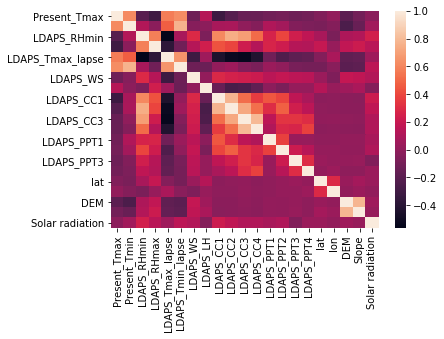

In [10]:
sns.heatmap(df[feat].corr())

In [11]:
df.columns

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

### Splitting features and target

In [12]:
X = df.drop(["Next_Tmax", "Next_Tmin"], axis = 1)
y1 = df["Next_Tmin"]
y2 = df["Next_Tmax"]

## scaling the data

In [13]:
from sklearn.preprocessing import MinMaxScaler
for col in feat:
    scaler = MinMaxScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

## linear regression

#### for minimum temperature

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.20)
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)
accuracy = round(LR.score(X_test, y_test),3)
accuracy

0.839

In [15]:
scores = cross_val_score(LR, X_train, y_train, scoring = "r2", cv = 5)
scores

array([0.83361902, 0.83815686, 0.82959727, 0.83213293, 0.83745531])

## Decision tree

In [16]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
DT_score = DT.score(X_test, y_test)
DT_score

0.7991610946062133

In [17]:
scores = cross_val_score(DT, X_train, y_train, scoring = "r2", cv = 5)
scores

array([0.77715668, 0.7801272 , 0.77146204, 0.75853348, 0.78665574])

## Random forest

In [18]:
from sklearn.ensemble import RandomForestRegressor

RF1 = RandomForestRegressor(n_estimators = 100)

RF1.fit(X_train, y_train)

RandomForestRegressor()

In [19]:
accuracy = RF1.score(X_test, y_test)
accuracy

0.9028886446338813

In [20]:
scores = cross_val_score(RF1,X_train, y_train, scoring = "r2", cv = 5 )
scores

array([0.90642654, 0.89960862, 0.89774662, 0.89405855, 0.89625681])

## Gradient Boost

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor(n_estimators = 80)

GB.fit(X_train, y_train)
accuracy = GB.score(X_test, y_test)
accuracy

0.8822193128377733

In [22]:
scores = cross_val_score(GB,X_train, y_train, scoring = "r2", cv = 5 )
scores

array([0.88226306, 0.88331618, 0.87733672, 0.87681689, 0.87524618])

## fine tuning the best model

Random forest comes out to be the best model with accuracy of 90%. We fine tune this model using grid search.

In [24]:
from sklearn.model_selection import GridSearchCV
param_dict = {
    "n_estimators":range(60,100, 15),
    "max_depth":range(5,10),
    "min_samples_split":range(2,5),
    "min_samples_leaf":range(1,5)
}
grid_RF = GridSearchCV(RF1,
                      param_grid=param_dict,
                      cv = 3,
                      verbose = 1,
                      n_jobs = -1)
grid_RF.fit(X_train, y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 5),
                         'n_estimators': range(60, 100, 15)},
             verbose=1)

GridSearch is taking too long time(hours).

In [25]:
grid_RF.best_params_

{'max_depth': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 75}

In [27]:
from sklearn.ensemble import RandomForestRegressor
RF1 = RandomForestRegressor(n_estimators = 75, min_samples_leaf = 2, min_samples_split=3, max_depth=9)
RF1.fit(X_train, y_train)
accuracy = RF1.score(X_test, y_test)
accuracy

0.8841709959476542

#### for maximum temperature

## Linear Regression

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.20)
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)
accuracy = round(LR.score(X_test, y_test),3)
accuracy

0.798

In [29]:
scores = cross_val_score(LR, X_train, y_train, scoring = "r2", cv = 5)
scores

array([0.77245244, 0.78368449, 0.76624977, 0.77459549, 0.76757656])

## Decision Tree

In [30]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
DT_score = DT.score(X_test, y_test)
DT_score

0.7785273669862915

In [31]:
scores = cross_val_score(DT, X_train, y_train, scoring = "r2", cv = 5)
scores

array([0.73560469, 0.75698864, 0.75122612, 0.74195092, 0.73962089])

## Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

RF2 = RandomForestRegressor(n_estimators = 100)

RF2.fit(X_train, y_train)

accuracy = RF2.score(X_test, y_test)
accuracy

0.9076820096179244

In [33]:
scores = cross_val_score(RF2,X_train, y_train, scoring = "r2", cv = 5 )
scores

array([0.89245922, 0.89071576, 0.89350586, 0.88079628, 0.88953518])

## Gradient Boost

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor(n_estimators = 80)

GB.fit(X_train, y_train)
accuracy = GB.score(X_test, y_test)
accuracy

0.85401297894967

In [35]:
scores = cross_val_score(GB,X_train, y_train, scoring = "r2", cv = 5 )
scores

array([0.83114748, 0.83088523, 0.83252057, 0.83669853, 0.83289528])

### saving the best model

Since the accuracy of the random forest model is best among all other models. We can save these models as pkl file.

In [36]:
pickle.dump(RF1, open('best_model1.pkl','wb'))
pickle.dump(RF2, open('best_model2.pkl','wb'))